In [32]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *
#from time import clock
#importation des bibliothèques utiles
from scipy.sparse.linalg import spsolve
from scipy.sparse import  spdiags

Autosaving every 300 seconds


# Equation de la chaleur
On va étudier la manière d'approcher l'équation de la chaleur. Celle-ci décrit les phénomènes transitoires (instationnaires) en temps d'un phénomène de diffusion.

On introduit d'abord un problème elliptique qui décrit le phénomène de diffusion stationnaire. On reprend le problème de Dirichlet étudié précédemment:
$$
\begin{align}
&-u_l''(x)=f(x),\quad \forall x\in ]0,L[,\\
&u_l(0)=u_l(L)=0.
\end {align}
$$
Le modèle parabolique décrit par l'équation de la chaleur s'écrit,
$$
\begin{align}
&\partial_t u(t,x)-\partial_{xx}u(t,x)=f(t,x),\quad \forall x\in ]0,L[,\\
&u(0,x)=u_0(x),~\forall x\in ]0,L[,\\
&u(t,0)=u(t,L)=0,~\forall t>0.
\end {align}
$$
## Rappel de propriétés 
On rappelle (cours) que, sous réserve de régularité de $f$, la solution satisfait l'estimation suivante, il existe $a>0$ tel que
$$
\|u(t,.)\|^2_{L^2((0,L))}\le \|u_0\|^2_{L^2((0,L))}e^{-a t}
+\int_0^t e^{-a (t-s)}\|f(s,x)\|^2_{L^2((0,L))}.
$$
On observe le caractère amorti de l'équation grâce à l'ellipticité de l'opérateur de Dirichlet. Si de plus $f$ ne dépend pas de $t$, on note $v(t,x)=u(t,x)-u_l(x)$ et $v$ satisfait,
$$
\begin{align}
&\partial_t v(t,x)-\partial_{xx}v(t,x)=0,\quad \forall x\in ]0,L[,\\
&v(t,0)=v(t,L)=0,~\forall t>0.
\end {align}
$$
On en déduit alors que
$$
\|v(t,.)\|^2_{L^2((0,L))}\le \|v(0,.)\|^2_{L^2((0,L))}e^{-a t}.
$$
On observe l'amortissement de $v$ vers $0$ soit l'amortissement de $u$ vers $u_l$. La solution du problème stationnaire est l'asymptotique du problème instationnaire, quelle que soit la donnée initiale.

## Schémas en temps Euler implicite
On propose le schéma d'Euler implicite, de pas $\delta t$, pour l'équation en $v$:
$$
\begin{align}
&\frac {v^{n+1}(x)-v^{n}(x)}{\delta t}-\partial_{xx}v^{n+1}(x)=0,\quad \forall x\in ]0,L[,\\
&v^{n+1}(0)=v^{n+1}(L)=0,\\
&v^0=v_0.
\end {align}
$$
On remarque qu'il s'agit d'une suite de problèmes elliptiques, ainsi la suite est bien définie dans $H^1_0((0,L))$ à partir du rang $1$ dès lors que $v_0\in H^{-1}((0,L))$.
En prenant le produit scalaire $L^2((0,L))$ de cette équation avec $v^{n+1}$ et en utilisant l'inégalité de Poincaré, on a,
$$
(1+a\delta t)\|v^{n+1}\|_{L^2((0,L))}^2\le \|v^{n+1}\|_{L^2((0,L))}^2+2\delta t\|\partial_x v^{n+1}\|_{L^2((0,L))}^2\le \|v^{n}\|_{L^2((0,L))}^2.
$$
On en déduit la convergence vers $0$, sous-géométrique, de $(v^n)_n$ dans $L^2((0,L))$.

Ceci établit la stabilité asymptotique $L^2((0,L))$ du schéma, **inconditonnellement sur le pas de temps**.
## Schémas en temps Euler explicite
On propose le schéma d'Euler explicite, de pas $\delta t$, pour l'équation en $v$:
$$
\begin{align}
&\frac {v^{n+1}(x)-v^{n}(x)}{\delta t}-\partial_{xx}v^{n}(x)=0,\quad \forall x\in ]0,L[,\\
&v^{n+1}(0)=v^{n+1}(L)=0,\\
&v^0=v_0.
\end {align}
$$
La suite perd $2$ crans de régularité Sobolev à chaque itération. Pour donner de bonnes propriétés à ce schéma, il sera nécessaire de le définir pour une discrétisation spatiale et de respecter une condition CFL qui limite le pas de temps en fonction du pas d'espace.

On introduit la discrétisation uniforme du segment $]0,L[$ par 
$$
x_i=i h, \quad i=0\cdots N+1,
$$
avec $h=\frac L {N+1}$.
On rappelle l'expression de la matrice de discrétisation par différence finie centrée,
$$
A=\frac 1 {h^2}\left (
\begin{array}{ccccc}2&-1&0&\cdots&0\\
-1&2&-1&0&\cdots\\
0&-1&2&-1&0 \\
-&-&-&-&-\\
0&\cdots&0&-1&2
\end{array}
\right ).
$$
Le schéma discrétisé en temps et en espace s'écrit, avec $V^n\in \mathbb R^N$,
$$
\begin{align}
&\frac {V^{n+1}-V^{n}}{\delta t}+A V^{n}=0,\\
&V^0=(v_0(x_1),\cdots,v_0(x_N))^t.
\end {align}
$$
On sait, cf cours, que ce schéma est asymptotiquement stable pour la norme $L^2$ et la norme $L^\infty$ sous la CFL $\delta t\le \frac {h^2}2$. Sous cette CFL, le schéma est mieux que $L^\infty$-stable, il respecte même le principe du maximum, en effet, en chaque noeud de discrétisation, la solution à l'itéré $n+1$ est combinaison convexe de la solution à l'itéré $n$:
$$
V_i^{n+1}=(1-2\frac {\delta t}{h^2})V_i^{n}+\frac {\delta t}{h^2}V_{i-1}^{n}+\frac {\delta t}{h^2}V_{i+1}^{n}.
$$
## Mise en oeuvre du schéma d'Euler implicite
Quel que soit le choix de l'approximation spatiale, du moment que les matrices qui approchent l'opérateur de Dirichlet et l'opérateur Identité sont définies positives, les schéma obtenu sera inconditionnellement stable pour la norme $L^2$.

On choisit de reprendre les différences finies centrées comme discrétisation spatiale.

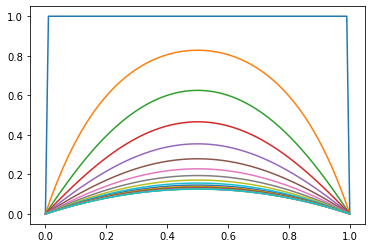

In [33]:
# le pas h
N=100
L=1
h=L/(N+1)
dt=0.05
# construction du vecteur de discrétisation
x=linspace(h,L-h,N)
x_avec_CL=linspace(0,L,N+2)
#construction de la fonction f de votre choix
f=lambda x : 1#150*x**2-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=(1/dt+2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=A.tocsr()
#donnee initiale
U=ones(N)
#boucle en temps
for n in range(int(1/dt)):
    U_avec_CL=zeros(N+2)
    U_avec_CL[1:N+1]=U
    plot(x_avec_CL,U_avec_CL);
    t=n*dt# utile si le critère d'arrêt porte sur le temps ou si le 
    #terme source dépend de t
    #SM=F*sin(t)+U/dt
    SM=F+U/dt
    #resolution du systeme creux
    U=spsolve(A,SM)
    


## Mise en oeuvre du schéma d'Euler explicite
On choisit de reprendre les différences finies centrées comme discrétisation spatiale. On doit vérifier la stabilité sous la CFL
$$
\delta t\le \frac {h^2} 2.
$$
Dans le code qui suit, modifier le coefficient CFL pour observer la stabilité ou l'instabilité. Dans le cas de l'instabilité, réduire le temps final afin d'observer la naissance de l'instabilité.

In [46]:
def chaleur_explicite(N,CFL,T):
    h=1/(N+1)
    dt=CFL*0.5*h**2
    # construction du vecteur de discrétisation
    x=linspace(h,1-h,N)
    x_avec_CL=linspace(0,1,N+2)
    #construction de la fonction f de votre choix
    f=lambda x : 1#150*x**2-100*x
    #construction du second membre du systeme
    F=f(x)
    #construction de la matrice en systeme creux
    D0=(2/h**2)*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    A=A.tocsr()
    #donnee initiale
    U=zeros(N)
    U[int(N/4):int(3*N/4)]=1
    #boucle en temps
    print('nombre d iterations',int(T/dt))
    for n in range(int(T/dt)):
        t=n*dt# utile si le critère d'arrêt porte sur le temps ou si le 
        #terme source dépend de t
        #iteration explicite du schéma
        U=U+dt*(F-A@U)
        if (n%10==0):
            #Ajout des CL de Dirichlet
            U_avec_CL=zeros(N+2)
            U_avec_CL[1:N+1]=U
            plot(x_avec_CL,U_avec_CL)
            #On rajoute les points de discrétisation sur l'axe des abscisses.
            scatter(x,0*x,[0.1],'red')
    return None

nombre d iterations 4084


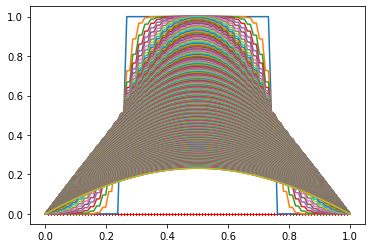

In [47]:
N=100
h=1/(N+1)
CFL=0.999
chaleur_explicite(N,CFL,0.2)

nombre d iterations 30


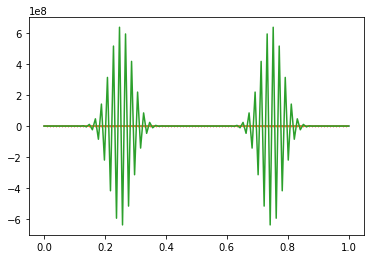

In [48]:
N=100
h=1/(N+1)
CFL=2.01
chaleur_explicite(N,CFL,0.003)

## Estimation d'erreur
Mettre en oeuvre une validation de l'erreur en temps et en espace. Les schémas proposés étant d'ordre 1 en temps et 2 en espace.

On va construire une solution non trivial et mesurer l'écart entre la solution exacte et approchée pour la norme discrète associée à la norme de l'espace continue $L^\infty(0,T;L^\infty(0,L))$.

On choisit la fonction $u(t,x)=\cos(t)\sin(x(x-L))$ qui satisfait les conditions limites de Dirichlet.
On choisit donc $u_0(x)=\sin(x(x-L))$ et on va calculer l'expression de $f$ afin que l'équation soit satisfaite.

In [49]:
import sympy as sy
t,x,L=sy.symbols('t x L')
u=sy.cos(t)*sy.sin(x*(x-L))
d_t_u=sy.diff(u,t)
d_x_u=sy.diff(u,x)
d_xx_u=sy.diff(d_x_u,x)
f=d_t_u-d_xx_u
print(f)


(-L + 2*x)**2*sin(x*(-L + x))*cos(t) - sin(t)*sin(x*(-L + x)) - 2*cos(t)*cos(x*(-L + x))


In [53]:
fex = lambda t,x,L : (-L + 2*x)**2*sin(x*(-L + x))*cos(t) - sin(t)*sin(x*(-L + x)) - 2*cos(t)*cos(x*(-L + x))
uex = lambda t,x,L : cos(t)*sin(x*(x-L))
def erreur_linfini(L,f,u,T,dt,N,ei):
    h=L/(N+1)
    x=linspace(h,L-h,N)
    #construction de la matrice en systeme creux
    D0=(2/h**2)*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    M=spdiags(ones(N),[0],N,N)/dt+A
    A=A.tocsr()
    M=M.tocsr()
    #donnee initiale
    U=u(0,x,L)# donnee intiale
    #boucle en temps
    print('nombre d iterations',int(T/dt))
    err=0
    for n in range(int(T/dt)):
        t=(n+0.5)*dt
        F=f(t,x,L)
        #iteration explicite du schéma
        if ei=='explicite':
            U=U+dt*(F-A@U)
        else:
            SM=F+U/dt
            U=spsolve(M,SM)
            
        err=max(err,max(abs(U-u((n+1)*dt,x,L)))/max(abs(U)))
    return err

nombre d iterations 424
nombre d iterations 2576
nombre d iterations 6545
nombre d iterations 12333
nombre d iterations 19939
nombre d iterations 29363
l'ordre de la méthode en h est : 1.9804162346330152


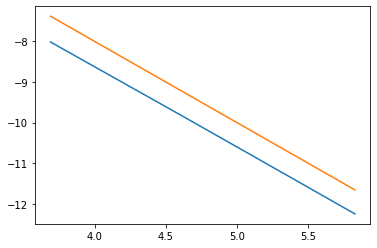

In [54]:
# test erreur explicite dt=CFL h**2
#on doit trouver une erreur d'ordre 2 en h, soit d'ordre 1 en dt
L=2
T=0.5 # temps final
CFL=0.99
errtab=[]
Ntab=[]
for N in range(40,400,60):
    h=L/(N+1)
    dt=CFL*0.5*h**2
    Ntab.append(N)
    errtab.append(erreur_linfini(L,fex,uex,T,dt,N,'explicite'))
plot(log(Ntab),log(errtab),log(Ntab),-2*log(Ntab))
print("l'ordre de la méthode en h est :",-polyfit(log(Ntab),log(errtab), 1)[0])

nombre d iterations 10
nombre d iterations 25
nombre d iterations 40
nombre d iterations 55
nombre d iterations 70
nombre d iterations 85
l'ordre de la méthode en h est : 0.9592547101016764


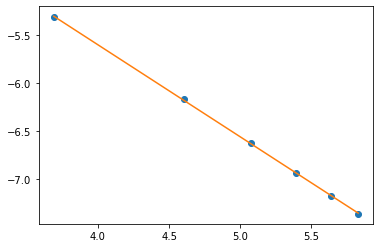

In [55]:
# test erreur implicite dt=h
#on doit trouver une erreur d'ordre 1 en h, car d'ordre 1 en dt
L=2
T=0.5 # temps final
errtab=[]
Ntab=[]
for N in range(40,400,60):
    h=L/(N+1)
    dt=h
    Ntab.append(N)
    errtab.append(erreur_linfini(L,fex,uex,T,dt,N,'implicite'))
plot(log(Ntab),log(errtab),'o')
plot(log(Ntab),polyfit(log(Ntab),log(errtab), 1)[0]*log(Ntab)+polyfit(log(Ntab),log(errtab), 1)[1])
print("l'ordre de la méthode en h est :",-polyfit(log(Ntab),log(errtab), 1)[0])

L'erreur d'ordre 1 en $h$ est exlusivement liée à l'approximation d'ordre 1 en temps avec $\delta t =h$.

## Schéma de Cranck-Nickolson
Ce schéma en temps, pour l'équation de la chaleur 1D sans terme source, s'écrit,
$$
\begin{align}
&\frac {V^{n+1}-V^{n}}{\delta t}+A \frac {V^{n}+V^{n+1}}{2}=0,\\
&V^0=(v_0(x_1),\cdots,v_0(x_N))^t,
\end {align}
$$
avec la matrice $A$ définie précédemment pour la disctrétisation spatiale par différence finie. 
### Ordre du schéma
Montrer que ce schéma est d'ordre 2 en temps et en espace.

Le terme $\frac {V^{n+1}-V^{n}}{\delta t}$ est une approximation différence finie centrée au temps $t_{n+\frac 1 2}=\frac {t_n+t_{n+1}}{2}$ de $\partial_t V$. L'erreur sur ce terme est donc en $\mathcal O(\delta t^2)$.

Le terme $\frac {V^{n}+V^{n+1}}{2}$ approche $V(t_{n+\frac  1 2 })$, en effet,
$$
V(t_n)=V(t_{n+\frac  1 2 })-\frac {\partial t}{2}\partial_tV(t_{n+\frac  1 2 })+\mathcal O(\delta t^2),
$$
$$V(t_{n+1})=V(t_{n+\frac  1 2 })+\frac {\partial t}{2}\partial_tV(t_{n+\frac  1 2 })+\mathcal O(\delta t^2),
$$
en sommant, on obtient,
$$
V(t_n)+V(t_{n+1})=2V(t_{n+\frac  1 2 })+\mathcal O(\delta t^2).
$$
On peut ainsi conclure que le schéma de Cranck-Nickolson est d'ordre 2 en temps. Par ailleurs, l'approximation différence finie centrée en espace de l'opérateur de Dirichlet est d'ordre 2 en espace. D'où l'approximation d'ordre 2 en temps et en espace avec ce schéma.

### Stabilité
Montrer que ce schéma est inconditionellement stable $l^2(\mathbb R^N)$.

On prend le produit scalaire de $\mathbb R^N$, noté $(.,.)$, entre l'expression du schéma et $\frac {V^{n}+V^{n+1}}{2}$ pour exploiter le fait que la matrice $A$ est définie positive ($(AV,V)\ge 0$).

On obtient alors 
$$
\left (\frac {V^{n+1}-V^{n}}{\delta t},\frac {V^{n}+V^{n+1}}{2}\right )\le 0.
$$
En développant le produit scalaire, on en déduit que, pour tout $\delta t>0$,
$$
\| V^{n+1}\|^2\le \| V^{n}\|^2.
$$
La décroissance de la norme Euclidienne garantit la A-stabilité in conditionnelle du schéma pour cette norme.

### Mise en oeuvre
Mettre en oeuvre ce schéma pour $v_0=\chi_{[\frac L 3, \frac L 2]}$.
Qu'observe-t-on pour de grand pas de temps au voisinage des discontinuités de la donnée initiale? Cela contredit-il le résultat de stabilité?

Vérifier l'ordre de la méthode pour une donnée initiale régulière de votre choix.

On va d'abord vérifier l'ordre 2 en temps et en espace en liant $\delta t=h$.

In [41]:
def erreur_CN_linfini(L,f,u,T,dt,N):
    h=L/(N+1)
    x=linspace(h,L-h,N)
    #construction de la matrice en systeme creux
    D0=(2/h**2)*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    A=.5*A
    M=spdiags(ones(N),[0],N,N)/dt+A
    A=A.tocsr()
    M=M.tocsr()
    #donnee initiale
    U=u(0,x,L)# donnee intiale
    #boucle en temps
    print('nombre d iterations',int(T/dt))
    err=0
    for n in range(int(T/dt)):
        t=n*dt
        F=f(t+dt/2,x,L)
        SM=F-A@U+U/dt
        U=spsolve(M,SM)    
        err=max(err,max(abs(U-u(t+dt,x,L)))/max(abs(U)))
    return err


nombre d iterations 10
nombre d iterations 25
nombre d iterations 40
nombre d iterations 55


nombre d iterations 70
nombre d iterations 85
l'ordre de la méthode en h=dt est : 1.977431987297843


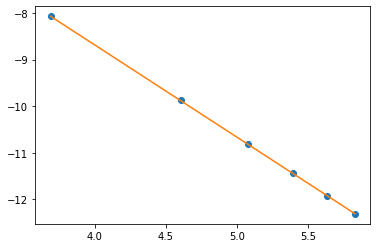

In [42]:
# test erreur implicite dt=h
#on doit trouver une erreur d'ordre 1 en h, car d'ordre 1 en dt
L=2
T=0.5 # temps final
errtab=[]
Ntab=[]
for N in range(40,400,60):
    h=L/(N+1)
    dt=h
    Ntab.append(N)
    errtab.append(erreur_CN_linfini(L,fex,uex,T,dt,N))
plot(log(Ntab),log(errtab),'o')
plot(log(Ntab),polyfit(log(Ntab),log(errtab), 1)[0]*log(Ntab)+polyfit(log(Ntab),log(errtab), 1)[1])
print("l'ordre de la méthode en h=dt est :",-polyfit(log(Ntab),log(errtab), 1)[0])

On a obtenu une méthode d'ordre 2 avec $\delta t=h$ et sans condition CFL. Ce schéma est donc pertinent pour ce problème. Néanmoins, ceci s'est bien passé car la solution est régulière en temps et en espace (solution analytique choisie $\mathcal C^\infty$ en $(t,x)$). On va mettre en évidence un défaut de ce schéma lorsque la donnée initiale est discontinue et le pas de temps de l'ordre de $h$. Ce schéma s'appuie sur la discrétisation explicite de la diffusion avec le poids $1/2$ et sur la discrétisation implicite de la diffusion avec le poids $1/2$. Si le poids sur l'explicite dépasse $1/2$, une condition CFL du type de celle du schéma d'Euler explicite apparaît. Le schéma de Cranck-Nickolson est ainsi en limite de stabilité inconditionnelle et on va l'observer sur l'exemple proposé avec une donnée initiale discontinue.

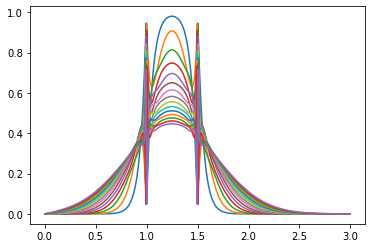

In [43]:
L=3
T=0.1
N=500
U=zeros(N)# donnee intiale
U[int(N/3):int(N/2)]=1
# Pour supprimer l'artefact, on décommente ci-dessous pour résoudre un pas de temps avec Euler implicite
#la solution obtenue est continue, l'artefact de CN n'pparaitra plus.

# theta=0.
# h=L/(N+1)
# dt=h#0.5*h**2
# x=linspace(h,L-h,N)
# #construction de la matrice en systeme creux
# D0=(2/h**2)*ones(N)
# D1=-1/h**2*ones(N)
# A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
# #A=.5*A
# M=spdiags(ones(N),[0],N,N)/dt+(1-theta)*A
# #donnee initiale
#t=0
# SM=-theta*A@U+U/dt
# U=spsolve(M,SM) 
theta=0.5 # CN est le theta-schéma pour theta=0.5
h=L/(N+1)
dt=h#0.5*h**2
x=linspace(h,L-h,N)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
M=spdiags(ones(N),[0],N,N)/dt+(1-theta)*A
A=A.tocsr()
M=M.tocsr()
for n in range(1,int(T/dt)):
    t=n*dt
    SM=-theta*A@U+U/dt
    U=spsolve(M,SM) 

    plot(x,U)

Avec un petit pas de temps type CFL du schéma explicite, on a la solution attendu avec régularisation de la solution et la "diffusion" du créneau.

En revanche, le même code avec un pas de temps raisonablement gros fait apparaître les artefacts ci-dessus hérités de la discontinuité. La solution reste stable, convergente en norme $L^2$.

On peut faire disparaître ces artefacts par une seule première résolution sur un pas de temps avec le schéma d'Euler implicite. La solution obtenue est continue à l'instant $\delta t$. Le schéma de Crack-Nickolson peut alors s'appliquer sans artefact ensuite, avec le gain en précision généré.

nombre d iterations 134


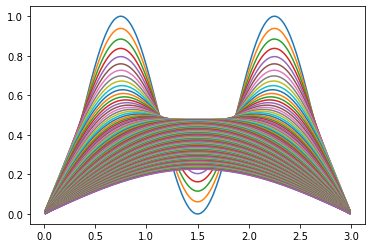

In [56]:
L=3
T=1
N=200
h=L/(N+1)
dt=0.5*h
x=linspace(h,L-h,N)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=.5*A
M=spdiags(ones(N),[0],N,N)/dt+A
A=A.tocsr()
M=M.tocsr()
#donnee initiale reguliere
U=sin(x*2*pi/L)**2
plot(x,U)
#boucle en temps
print('nombre d iterations',int(T/dt))
err=0
for n in range(int(T/dt)):
    t=n*dt
    SM=-A@U+U/dt
    U=spsolve(M,SM) 
    plot(x,U)

# La chaleur 2D
L'objectif ici est d'étendre les simulations numériques obtenues en dimension 1 à la dimension 2 sur un rectangle $\Omega=]0,L[\times]0,H[$.

On va se contenter d'appliquer ici le schéma d'Euler implicite sur le problème de Dirichlet 2D, sans terme source et avec une donnée intiale discontinue.

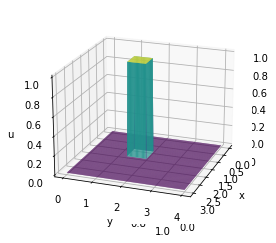

nombre d iterations 6


/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


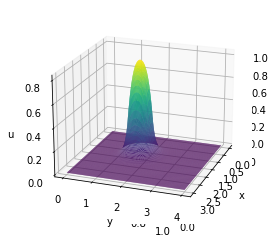

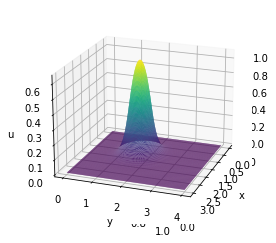

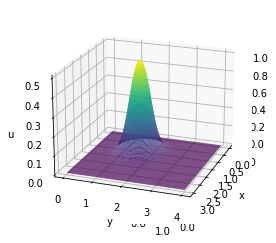

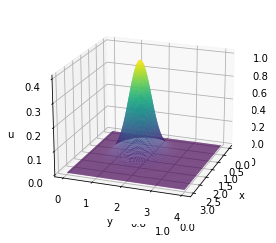

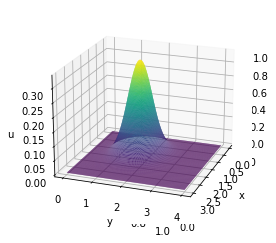

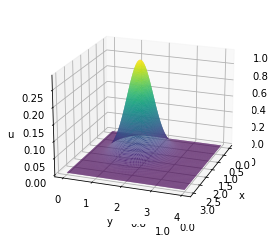

In [45]:
L=3
H=4
T=0.1
N=140
M=130
l=L/(N+1)
h=H/(M+1)
dt=0.5*h
x=linspace(l,L-l,N)
y=linspace(h,H-h,M)
from mpl_toolkits import mplot3d
X, Y = meshgrid(linspace(0,L,N+2),linspace(0,H,M+2))
#construction de la matrice en systeme creux
D0=(1/dt+2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DN=-1/h**2*ones(N*M)
A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)
A=A.tocsr()
#donnee initiale
Utab=zeros((N,M))# donnee intiale
Utab[int(N/3):int(N/2), int(M/3):int(M/2)]=1
U=reshape(Utab.T,N*M)
uu=Utab.T
uubord=0*ones((M+2,N+2));
uubord[1:M+1,1:N+1]=uu;
#print(A.toarray())

ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(20, 20)
show()
#boucle en temps
print('nombre d iterations',int(T/dt))
for n in range(int(T/dt)):
    t=n*dt
    SM=U/dt
    U=spsolve(A,SM) 
    # representation graphique de la solution
    if (n%1==0):
        uu=reshape(U,(M,N))
        uubord=0*ones((M+2,N+2));
        uubord[1:M+1,1:N+1]=uu;
        #print(A.toarray())

        ax = plt.axes(projection='3d')
        ax = plt.axes(projection='3d')
        #ax.contour3D(X, Y, uubord, 50, cmap='binary')
        ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none');
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('u');
        ax.view_init(20, 20)
        show()